<a href="https://colab.research.google.com/github/GUC-DM/w25-mini-project-2-george-samy-t05-yassin-ahmed-t05/blob/main/Classification_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

## Dataset Description

The following dataset includes information about loan applicants, including factors such as income, credit score, employment status, loan details, and other indicators of financial stability, along with the final decision showing whether each loan was approved or not.

| Column | Description|
|-|-|
|ApplicationNumber|Unique identifier assigned to each loan application|
|Age|Applicant’s age in years|
|AnnualIncome|Applicant’s yearly income|
|CreditScore|A score representing the applicant’s creditworthiness|
|EmploymentStatus|Applicant’s current employment situation (Employed, Unemployed, Self-Employed)|
|EducationLevel|Highest educational qualification attained (Highschool, Bachelor, Master, Doctorate, Diploma)|
|LoanAmount|Total amount of money requested for the loan|
|LoanDuration|Duration of the loan in months|
|MaritalStatus|Applicant’s marital state (Divorced, Married, Single, Widowed)|
|NumberOfDependents|Number of individuals financially dependent on the applicant|
|HomeOwnershipStatus|Applicant’s housing status (Mortagage, Own, Rent, Other)|
|BankruptcyHistory|Indicates whether the applicant has previously declared bankruptcy (0 = No, 1 = Yes)|
|LoanPurpose|The primary reason for taking the loan (Debt Consolidation, Home Improvement, Education, Personal)|
|PreviousLoanDefaults|Indicates if the applicant has defaulted on any previous loans (0 = No, 1 = Yes)|
|MonthlyLoanPayment|Amount the applicant would need to pay monthly to repay the loan|
|MonthlyIncome|Average monthly income of the applicant|
|JobTenure|Number of years the applicant has been in their current job|
|LoanApproved|Indicates loan approval status (No = Not Approved, Yes = Approved)|

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/loan_data.csv')
df.head()

,ApplicationNumber,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,MonthlyLoanPayment,MonthlyIncome,JobTenure,LoanApproved
0,26231,18,"$26,992.00",586,Employed,Diploma,"$22,432.00",36 months,Single,3,Mortgage,0,Debt Consolidation,0,$623.11,"$2,249.33",3,No
1,13176,18,"$22,825.00",581,Self-Employed,Master,"$30,457.00",24 months,Single,0,Rent,0,Home Improvement,0,"$1,269.04","$1,902.08",5,No
2,27751,18,"$75,891.00",522,Employed,Bachelor,"$30,583.00",96 months,Married,2,Mortgage,0,Personal,0,$318.57,"$6,324.25",6,No
3,20628,18,"$92,094.00",565,Employed,Bachelor,"$72,738.00",36 months,Single,1,Mortgage,0,Vehicle,0,NaN,"$7,674.50",3,No
4,28773,18,"$35,686.00",554,Employed,Diploma,"$28,021.00",36 months,Married,3,Rent,0,Home Improvement,0,$778.36,"$2,973.83",1,No


## Data Inspection

In [2]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}\n")

ApplicationNumber: [26231 13176 27751 ... 18749 13396 17392]

Age: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80]

AnnualIncome: ['$26,992.00' '$22,825.00' '$75,891.00' ... '$111,290.00' '$48,501.00'
 '$95,945.00']

CreditScore: [586 581 522 565 554 531 574 479 621 520 504 435 558 611 505 606 524 588
 557 548 523 594 604 501 585 561 575 551 533 487 539 610 589 525 527 545
 432 568 521 459 507 439 567 602 566 573 583 526 546 515 607 535 597 579
 510 587 550 605 430 486 528 622 580 600 556 458 562 537 598 591 476 603
 564 418 570 559 601 485 467 398 552 494 444 516 497 540 466 433 462 553
 543 576 542 571 599 617 457 475 538 478 596 560 569 584 532 578 625 593
 614 536 518 609 555 547 563 426 636 472 541 474 623 509 513 483 492 496
 620 530 465 517 577 477 508 440 608 493 421 451 616 500 534 613 544 514
 529 572 460 482 506 450 452 519 489 612 

show me distinct values for each columns data to help me see if there is somthing worng like  LoanApproved: ['No' 'Yes' 'no' 'yes'] or usless columns which have only 1 value like BankruptcyHistory: [0]


In [3]:
df.describe()

,ApplicationNumber,Age,CreditScore,NumberOfDependents,BankruptcyHistory,PreviousLoanDefaults,JobTenure
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,20000.000000
mean,20500.500000,39.752600,571.612400,1.517300,0.0,0.100050,5.002650
std,5773.647028,11.622713,50.997358,1.386325,0.0,0.300074,2.236804
min,10501.000000,18.000000,343.000000,0.000000,0.0,0.000000,0.000000
25%,15500.750000,32.000000,540.000000,0.000000,0.0,0.000000,3.000000
50%,20500.500000,40.000000,578.000000,1.000000,0.0,0.000000,5.000000
75%,25500.250000,48.000000,609.000000,2.000000,0.0,0.000000,6.000000
max,30500.000000,80.000000,712.000000,5.000000,0.0,1.000000,16.000000


.desceibe() show quartiles and count and mean and standard diviation for numeric columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ApplicationNumber     20000 non-null  int64 
 1   Age                   20000 non-null  int64 
 2   AnnualIncome          20000 non-null  object
 3   CreditScore           20000 non-null  int64 
 4   EmploymentStatus      16260 non-null  object
 5   EducationLevel        20000 non-null  object
 6   LoanAmount            20000 non-null  object
 7   LoanDuration          20000 non-null  object
 8   MaritalStatus         20000 non-null  object
 9   NumberOfDependents    20000 non-null  int64 
 10  HomeOwnershipStatus   20000 non-null  object
 11  BankruptcyHistory     20000 non-null  int64 
 12  LoanPurpose           20000 non-null  object
 13  PreviousLoanDefaults  20000 non-null  int64 
 14  MonthlyLoanPayment    15660 non-null  object
 15  MonthlyIncome         17160 non-null

.info() help us know types of each column and how many row per column have null value

## Data Cleaning

In [5]:
currency_cols = ["AnnualIncome", "LoanAmount", "MonthlyLoanPayment", "MonthlyIncome"]

for col in currency_cols:
    df[col] =(df[col].str.replace("$", "", regex=False).str.replace(",", "", regex=False).astype("float64"))


we collected the colmns which have dollar sign and comma and removed it from the values and converted the data type to float using a for loop to loop for each column in the currency_col and regex=false treat your search string as normal text not a regex pattern.

In [6]:
df["LoanDuration"] = df["LoanDuration"].str.replace(" months", "").astype(int)


remove the " monthes" string and covert type to int because this is number of monthes and trees prefer numbers than objects

In [7]:
df["LoanApproved"] = df["LoanApproved"].str.lower().map({"yes":1, "no":0})


lower case all values because there was Yes,yes,No,no and convert them to 0 and 1 to help the model and unify structure

In [8]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


make a list num_cols which include all columns wha=ich has numeric values either in or float and do the same in cat_col for categoral columns and loop on each col to see if any of them have null values and for num_col we replace it be median because they are numeric and its better than mean because its less senstive to extremes or outliers and for cat_col we replace it be mode which is the most repeated values this way is better than the manual way to prevent missing any nan values

In [9]:
df["Monthly_Debt_To_Income_Ratio"] = df["MonthlyLoanPayment"] / df["MonthlyIncome"]


this line creates new column by dividing monthlyloanpayment by monthlyincome to show percentage of income someone spends on debt each month this will help us later (assess ability to repay loans) if high values means more risky applicant and this is feature eng.

## Exploratory Data Analysis

[link text](https://)**Q1: On average, which type of educational level has the highest approval rate? Show their order on the graph.**

**Visualization**

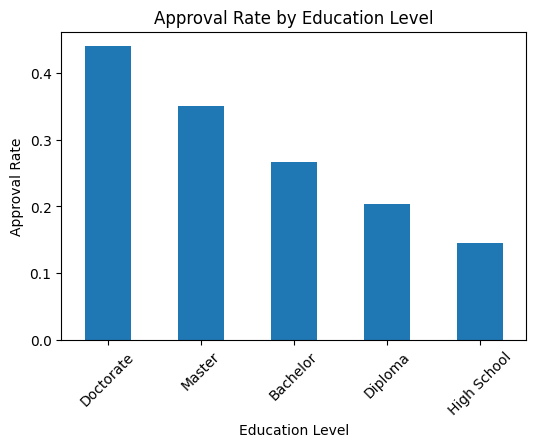

In [10]:
edu_rate = df.groupby("EducationLevel")["LoanApproved"].mean()

edu_rate_sorted = edu_rate.sort_values(ascending=False)

edu_rate_sorted.plot(kind="bar", figsize=(6,4))
plt.title("Approval Rate by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Approval Rate")
plt.xticks(rotation=45)
plt.show()


**Answer for Q1**: Your answer here

we grouped education level based on loan approval averge then sorted the values from highest to lowest and plotted as bar chart and added the labels and accroding to the graph the highes approvals are doctorates->master->bachelor holders we used the bar chart escpecially to see the diffrance and help us to compare between rates

**Q2: How does the annual income vary among approved applicants? Interpret the values of the 3 quartiles.**

**Visualization**

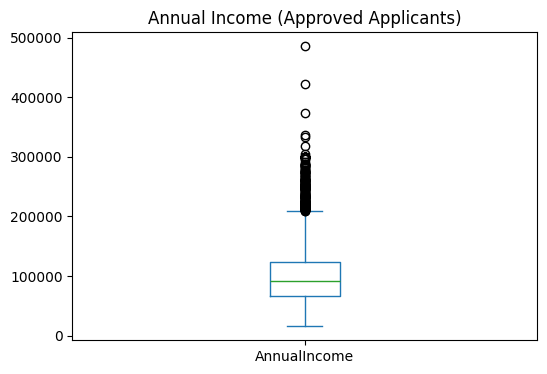

0.25     67380.5
0.50     91269.5
0.75    123959.5
Name: AnnualIncome, dtype: float64


In [11]:

approved_income = df[df["LoanApproved"]==1]["AnnualIncome"]

approved_income.describe()[["25%","50%","75%"]]
approved_income.plot(kind="box", figsize=(6,4))
plt.title("Annual Income (Approved Applicants)")
plt.show()
approved_income = df[df["LoanApproved"] == 1]["AnnualIncome"]

quartiles = approved_income.quantile([0.25, 0.50, 0.75])
print(quartiles)



**Answer for Q2**: Your answer here

we first filtered approved laon applicants then showed percintiles of thier annual income variation we used the boxplot because it helps us see the variation of a varible, quartiles and outliers
the 25 Q IS ABOUT 67380.5 the 50 is about 91K,the 75 is about 12K and there are some outliers from 200-500k

**Q3: How does the age of an applicant affect their credit score? (Hint: Use the line of best fit.)**

**Visualization**

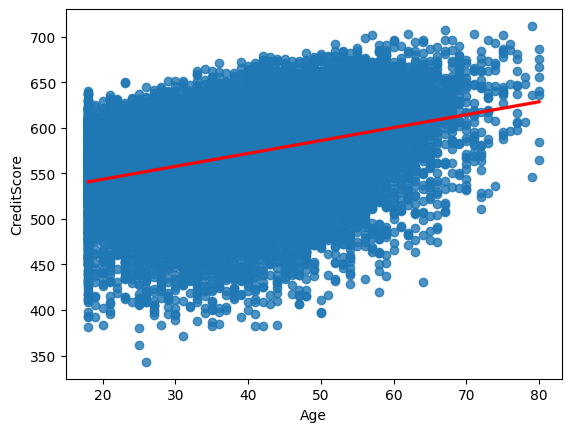

In [12]:
sns.regplot(x="Age", y="CreditScore", data=df, line_kws={"color": "red"})
plt.show()


**Answer for Q3**: Your answer here

we used the scatter plot and best fit line to show the relation and this showes us that there is a positive relation as age increase so credit sscore increase which means older applicants have higher credit score

**Q4: Is the distribution of applicants' income per month normal or skewed?**

**Visualization**

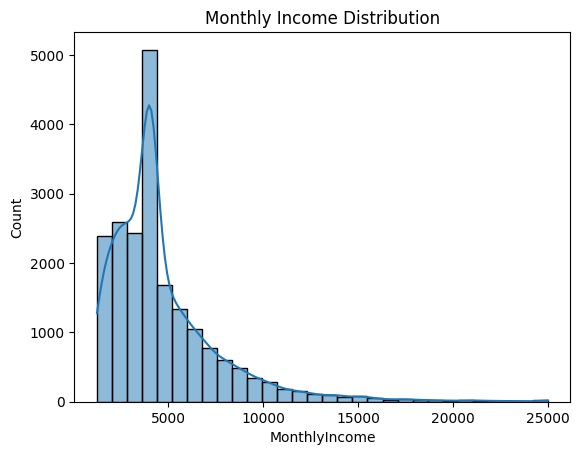

In [13]:
sns.histplot(df["MonthlyIncome"], kde=True, bins=30)
plt.title("Monthly Income Distribution")
plt.show()


**Answer for Q4**: Your answer here

we used the histogram specificly bec it help us see the distrbution and its skeweneass and its right skewed which means a smaller number have high income as showen

## Data Preparation for Modelling

In [14]:
nominal_cols = ['EmploymentStatus', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

education_order = {'High School': 0, 'Diploma': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4}
df['EducationLevel'] = df['EducationLevel'].map(education_order)



now we are preprocessing the data to make it easier for the model to use we use onehot for nominal data which have no order and label for ordinal data and no normlization needed for the DT bec it doesnt care about it


## Modelling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


X = df.drop(["ApplicationNumber", "LoanApproved"], axis=1)
y = df["LoanApproved"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Decision Tree with class imbalance handling
clf = DecisionTreeClassifier(
    max_depth=6,
    random_state=42,
    class_weight="balanced"
)


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


first we split the data to x input feature we removed these 2 columns because one have id and other only 0 values which wont help us in the predicition and y target output whihc is whether loan is approved or not then we split the data to training and testing and set test size =0.25 and randomsatae makes split reproducible and max_depth limit size of the tree to prevent it from overfitting and class_weight="balanced" auto fix class imbalances then train then predict this is used bec if we have small percentange in a certian class so this makes predictions better


## Evaluation

Accuracy: 0.8254

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88      3812
           1       0.59      0.88      0.71      1188

    accuracy                           0.83      5000
   macro avg       0.77      0.84      0.79      5000
weighted avg       0.87      0.83      0.84      5000



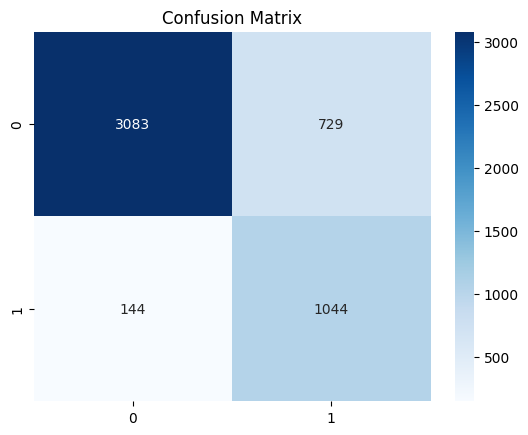

In [16]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.show()



then evaluate by printing accuracy which is percent of correct prediction and classification report prints recall percision and f1 and the model predit 83% correct according to accuracy and percision for class 0 which means accuracy of saying not approved is 96 correct and and recall 81 which means out of the real not approved the model predect 81 percemt correctly and f1 is a number whihch combine the score of recall and percision and the same is applied on class 1 percsion 59 and recall 88
we can say that the model finds most approved loans correctly but it makes mistakes by approving some people who should not be approved
note: we use accuracy if the 2 classes are balanced and we use recall and percsion (f1 score combine of persicion and recall) if classes are not balanced but we handled inbalances in the preprocessing so the results are close between f1 and accuracy
Precision in genral means :correctness of positive prediction
recall:covering all real positives  
matrix:
true negatives (3083)=actual no + predicted no=correct rejections
false negatives (729)=actual no + predicted yes=wrong approvals
false positives (144)=actual yes + predicted no =the model wrongly rejects good customers
true positives (1044)=actual yes + predicted yes = correct approvals

Q5

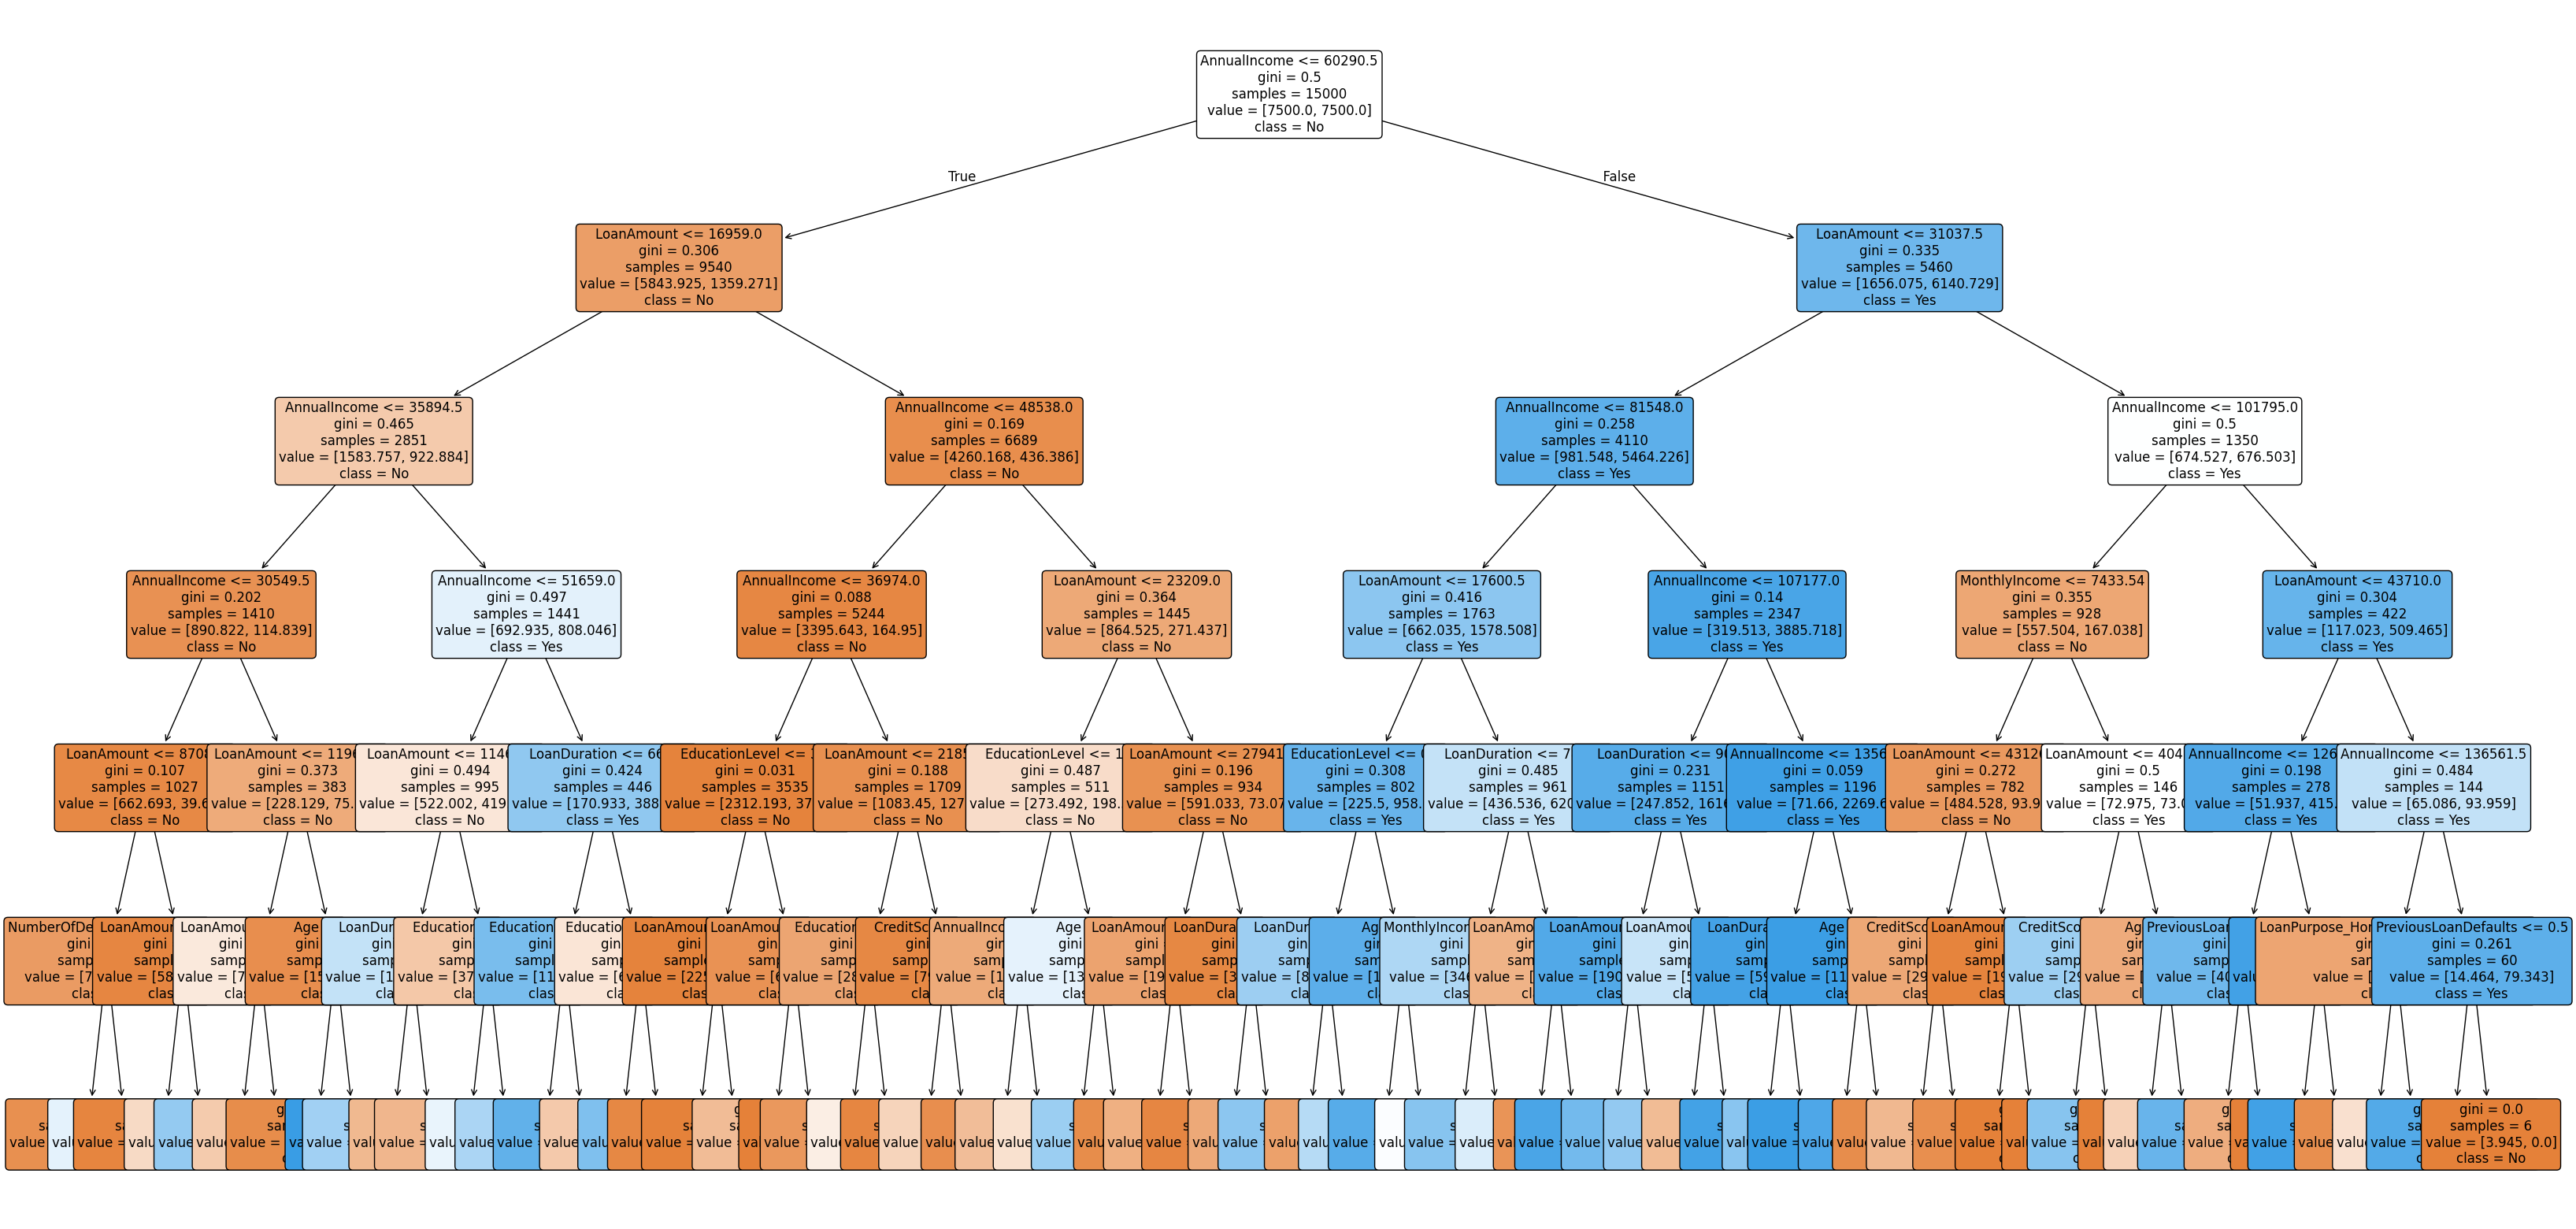

In [17]:
from sklearn.tree import plot_tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 20))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.show()



viz the tree with its cases because we used 1hot encode there are many cases but we can use this digram for tracing check the condition of reach cell and go left for ture and right for false
path annualincome > 60,209.5 and
loanamount > 31,037.5 and
annualincome > 101,795 and
loanamount > 4,310 and
annualincome > 136,561.5 and
previousloandefauls > 0.5 then no

## Bonus (Optional)

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest on the same train data
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)


here is the training of random forcast model on the same data and making prediction

Random Forest Accuracy: 0.8868

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3812
           1       0.79      0.71      0.75      1188

    accuracy                           0.89      5000
   macro avg       0.85      0.83      0.84      5000
weighted avg       0.88      0.89      0.88      5000



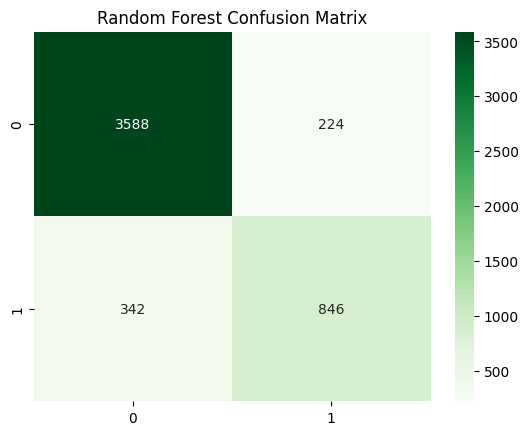

In [19]:
from sklearn.metrics import accuracy_score, f1_score

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

print("\nRandom Forest Classification Report:\n")
print(classification_report(y_test, rf_pred))

cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, cmap="Greens", fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.show()



heres the same as the previous report we did  but for the new model

In [20]:
dt_accuracy = accuracy_score(y_test, y_pred)   # decision tree pred
dt_f1 = f1_score(y_test, y_pred)

rf_accuracy = accuracy_score(y_test, rf_pred)   # random forest
rf_f1 = f1_score(y_test, rf_pred)

print(f"Decision Tree  - Accuracy: {dt_accuracy:.4f}, F1: {dt_f1:.4f}")
print(f"Random Forest  - Accuracy: {rf_accuracy:.4f}, F1: {rf_f1:.4f}")

Decision Tree  - Accuracy: 0.8254, F1: 0.7052
Random Forest  - Accuracy: 0.8868, F1: 0.7493


we can see that the new model is better than the DT when comparing them which means it makes fewer mistakes and balances precision and recall is better (f1) this improvement happens because random forest combines many decision trees so it reduces overfitting and makes better predictions
therefore i would choose the random forest model as the better classifier for this task